# Examples for generating Perlin noise in 1D, 2D and 3D

For a given input image grid or signal grid, the general method for generating Perlin noise can roughly be described as follows:
1. Define a grid on top of the image or signal. Generally, this grid will be coarser than the original image grid.
2. Position pre-determined gradient vectors on the coarse grid. These gradient vectors are randomly selected from a fixed list of gradient vectors and are positioned at each point of the coarse grid.
3. For each pixel in the image (gridpoint in original image grid), compute the distance vector for each of the nearest gridpoints (2 in 1D, 4 in 2D and 8 in 3D) on the coarse grid.
4. Compute the inner-product between these distance vectors and the gradient vectors.
5. Interpolate each of these inner-product values to compute the noise at the current pixel

Here are some nice references describing the algorithm in more detail:
- [Perlin noise explanation and code](https://flafla2.github.io/2014/08/09/perlinnoise.html)
- [Perlin noise video (explanation starts at 6:45)](https://youtu.be/MJ3bvCkHJtE?t=403)


The code to generate all of these examples is found in the file `noise_generator.py`. The key function there is the function `perlin_3d_hash`. By looking at the code, you will see that the previously outlined steps are present  (although some are combined into a single line making the code quite compact).

## 1D Examples

### Imports and default arguments

In [1]:
import numpy as np
from scaas.noise_generator import perlin
import matplotlib.pyplot as plt

nx = 1000
nptsx = 2

# Default arguments
octave = 4; period = 10.0; amp=1.0; persist = 0.5; ncpu = 1

### Plot Perlin curves for different octaves (an octave is one "set" of noise. An increase in an octave means the frequency has been doubled)

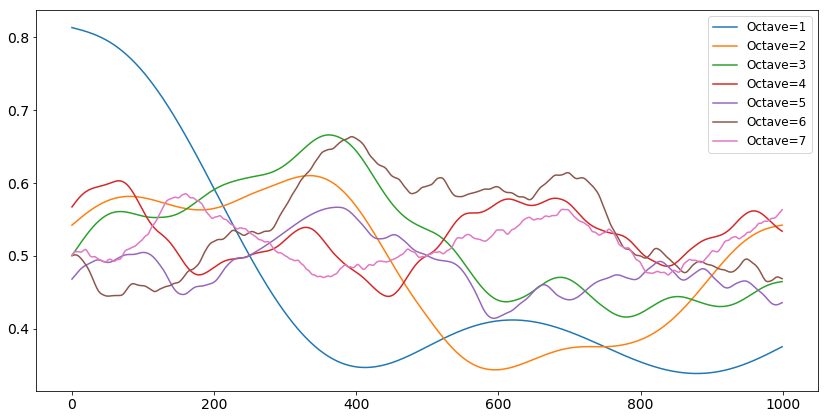

In [2]:
# Plotting octaves
nocts = 8
octs1 = np.zeros([nocts,nx])
fig = plt.figure(1,figsize=(14,7)); ax = fig.gca()
k = 0
for ioct in range(1,nocts):
    octs1[k] = perlin(x=np.linspace(0,nptsx,nx),octaves=ioct,amp=amp,persist=persist,period=period,ncpu=ncpu)
    lin, = ax.plot(octs1[k])
    lin.set_label('Octave=%d'%(ioct))
    k += 1
ax.legend(prop={"size":12})
ax.tick_params(labelsize=14)

### Plot Perlin curves for different persistance values (the influence of each successive octave) 

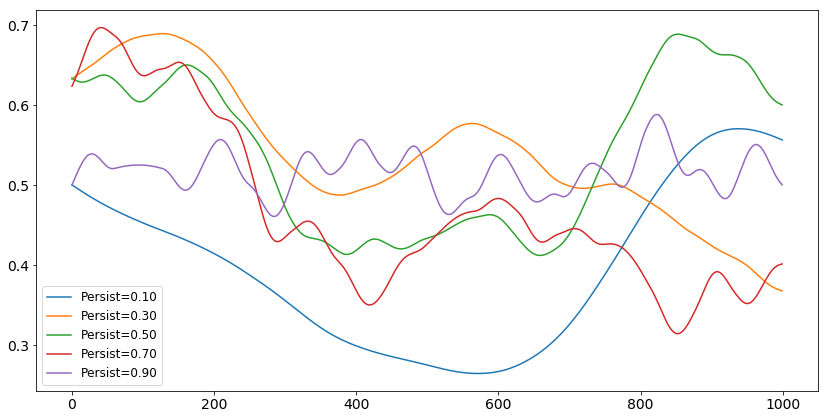

In [3]:
# Plotting persist
npsts = 5; dpst = 0.2; opst = 0.1
psts1 = np.zeros([npsts,nx])
fig = plt.figure(2,figsize=(14,7)); ax = fig.gca()
for ipst in range(npsts):
    pst = opst + dpst*ipst
    psts1[ipst] = perlin(x=np.linspace(0,nptsx,nx),octaves=octave,amp=amp,persist=pst,period=period,ncpu=ncpu)
    lin, = ax.plot(psts1[ipst])
    lin.set_label('Persist=%.2f'%(pst))
ax.legend(prop={"size":12})
ax.tick_params(labelsize=14)

### Plot Perlin curves for different gradient grids (finer grids lead to higher frequency curves)

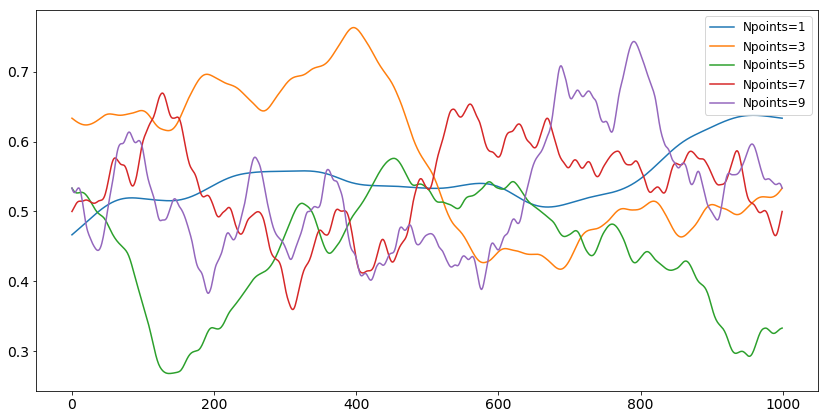

In [4]:
# Plotting npts
nnpts = 10
pts1 = np.zeros([nnpts,nx])
fig = plt.figure(3,figsize=(14,7)); ax = fig.gca()
k = 0
for ipts in range(1,nnpts,2):
    pts1[k] = perlin(x=np.linspace(0,ipts,nx),octaves=octave,amp=amp,persist=persist,period=period,ncpu=ncpu)
    lin, = ax.plot(pts1[k])
    lin.set_label('Npoints=%d'%(ipts))
ax.legend(prop={"size":12})
ax.tick_params(labelsize=14)


### Plot Perlin curves for different periods (decreasing or changing grid causes noise to be periodic)

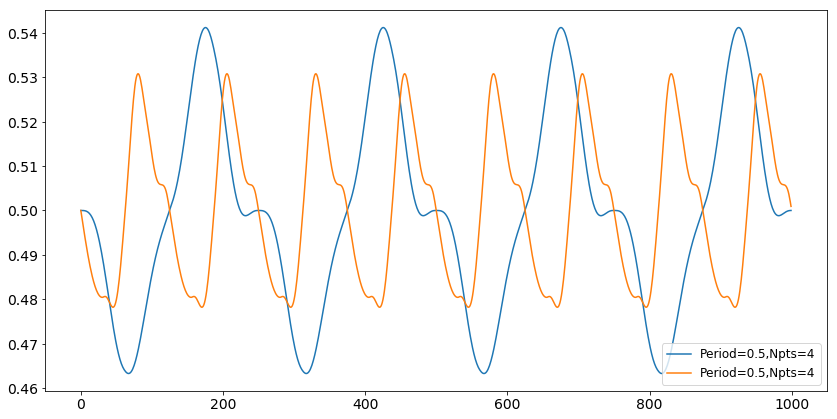

In [5]:
# Plotting periods
prd = 0.5
fig = plt.figure(4,figsize=(14,7)); ax = fig.gca()
per1 = perlin(x=np.linspace(0,nptsx,nx),octaves=octave,amp=amp,persist=persist,period=prd,ncpu=ncpu)
lin1, = ax.plot(per1)
lin1.set_label("Period=%.1f,Npts=%d"%(prd,2*nptsx))
# Keep same period but increase ptsx (finer grid)
per2 = perlin(x=np.linspace(0,nptsx*2,nx),octaves=octave,amp=amp,persist=persist,period=prd,ncpu=ncpu)
lin2, = ax.plot(per2)
lin2.set_label("Period=%.1f,Npts=%d"%(prd,2*nptsx))
ax.legend(prop={"size":12})
ax.tick_params(labelsize=14)

## 2D examples

To run the 2D examples everything stays the same except now we need to define a 2D gradient grid. Note these take a bit longer. I did not realize until now that the code is not super efficient. You can try to use ncpu > 1 but I find that sometimes it hangs when you do this (something to do with python multiprocessing)

### Redefine the grid and the defaults

In [6]:
nx = 250; ny = 200; 
nptsx = 2; nptsy = 3 

# Default arguments
octave = 4; period = 10.0; amp=1.0; persist = 0.5; ncpu = 1

### 2D octave example

Note in this example that the higher octaves don't appear to change the noise much. This is because of the persistance value of 0.5. If you increase that, they will influence more (see next example)

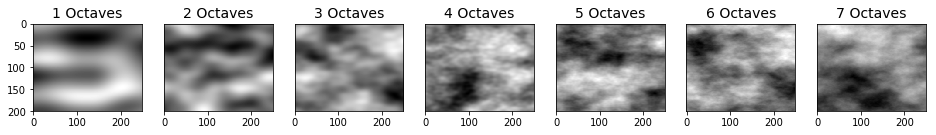

In [7]:
nocts = 8 
octs2 = np.zeros([nocts,ny,nx])
fig,ax = plt.subplots(1,7,figsize=(16,8))
k = 0
for ioct in range(1,nocts):
    octs2[k] = perlin(x=np.linspace(0,nptsx,nx),y=np.linspace(0,nptsy,ny),octaves=ioct,amp=amp,persist=persist,period=period,ncpu=ncpu)
    im = ax[k].imshow(octs2[k],cmap='gray')
    ax[k].tick_params(labelsize=10)
    if(k != 0): 
        ax[k].set_yticks([])
    ax[k].set_title('%d Octaves'%ioct,fontsize=14)
    k += 1

### 2D persistance example

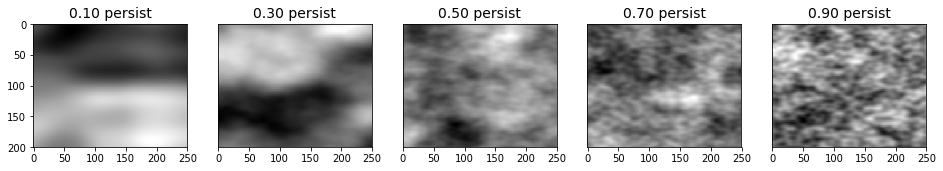

In [8]:
# Plotting persistance
npsts = 5; dpst = 0.2; opst = 0.1 
psts2 = np.zeros([npsts,ny,nx])
fig,ax = plt.subplots(1,npsts,figsize=(16,8))
for ipst in range(npsts):
    pst = opst + dpst*ipst
    psts2[ipst] = perlin(x=np.linspace(0,nptsx,nx),y=np.linspace(0,nptsy,ny),octaves=octave,amp=amp,persist=pst,period=period,ncpu=ncpu)
    im = ax[ipst].imshow(psts2[ipst],cmap='gray')
    ax[ipst].tick_params(labelsize=10)
    if(ipst != 0): 
        ax[ipst].set_yticks([])
    ax[ipst].set_title('%.2f persist'%pst,fontsize=14)


### 2D grid examples 

#### Make the x grid (fast axis) finer

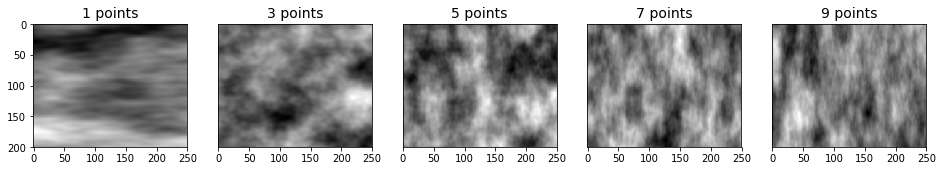

In [9]:
# Plotting nptsx
nnpts = 10
pts2x = np.zeros([nnpts,ny,nx])
fig,ax = plt.subplots(1,5,figsize=(16,8))
k = 0
for ipts in range(1,nnpts,2):
    pts2x[k] = perlin(x=np.linspace(0,ipts,nx),y=np.linspace(0,nptsy,ny),octaves=octave,amp=amp,persist=persist,period=period,ncpu=ncpu)
    im = ax[k].imshow(pts2x[k],cmap='gray')
    ax[k].tick_params(labelsize=10)
    if(k != 0):
      ax[k].set_yticks([])
    ax[k].set_title("%d points"%ipts,fontsize=14)
    k += 1

#### Make the y grid (slow axis) finer

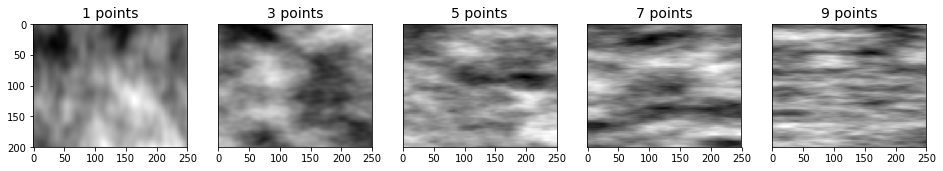

In [10]:
# Plotting nptsy
nnpts = 10
pts2y = np.zeros([nnpts,ny,nx])
fig,ax = plt.subplots(1,5,figsize=(16,8))
k = 0
for ipts in range(1,nnpts,2):
    pts2y[k] = perlin(x=np.linspace(0,nptsx,nx),y=np.linspace(0,ipts,ny),octaves=octave,amp=amp,persist=persist,period=period,ncpu=ncpu)
    im = ax[k].imshow(pts2y[k],cmap='gray')
    ax[k].tick_params(labelsize=10)
    if(k != 0):
      ax[k].set_yticks([])
    ax[k].set_title("%d points"%ipts,fontsize=14)
    k += 1


#### Make both grids finer

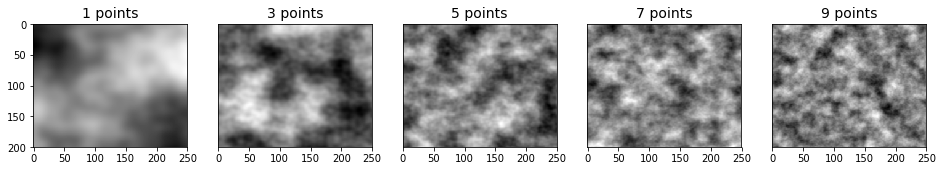

In [11]:
# Plotting nptsx and nptsy
nnpts = 10
pts2xy = np.zeros([nnpts,ny,nx])
fig,ax = plt.subplots(1,5,figsize=(16,8))
k = 0
for ipts in range(1,nnpts,2):
    pts2xy[k] = perlin(x=np.linspace(0,ipts,nx),y=np.linspace(0,ipts,ny),octaves=octave,amp=amp,persist=persist,period=period,ncpu=ncpu)
    im = ax[k].imshow(pts2xy[k],cmap='gray')
    ax[k].tick_params(labelsize=10)
    if(k != 0):
        ax[k].set_yticks([])
    ax[k].set_title("%d points"%ipts,fontsize=14)
    k += 1

### 2D period example

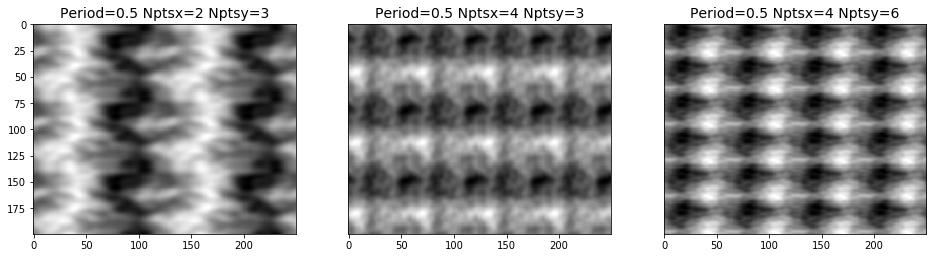

In [12]:
# Plotting periods
prd2 = 1.0
fig,ax = plt.subplots(1,3,figsize=(16,8))
per2d = perlin(x=np.linspace(0,nptsx,nx),y=np.linspace(0,nptsy,ny),octaves=octave,amp=amp,persist=persist,period=prd2,ncpu=ncpu)
im = ax[0].imshow(per2d,cmap='gray')
ax[0].set_title('Period=%.1f Nptsx=%d Nptsy=%d'%(prd,nptsx,nptsy),fontsize=14)
# Keep same period but increase ptsx
per2dx = perlin(x=np.linspace(0,nptsx*2,nx),y=np.linspace(0,nptsy,ny),octaves=octave,amp=amp,persist=persist,period=prd2,ncpu=ncpu)
im = ax[1].imshow(per2dx,cmap='gray')
ax[1].set_yticks([])
ax[1].set_title('Period=%.1f Nptsx=%d Nptsy=%d'%(prd,2*nptsx,nptsy),fontsize=14)
# Keep same period but increase ptsx and ptsy
per2dy = perlin(x=np.linspace(0,nptsx*2,nx),y=np.linspace(0,nptsy*2,ny),octaves=octave,amp=amp,persist=persist,period=prd2,ncpu=ncpu)
im = ax[2].imshow(per2dy,cmap='gray')
ax[2].set_yticks([])
ttl = ax[2].set_title('Period=%.1f Nptsx=%d Nptsy=%d'%(prd,2*nptsx,2*nptsy),fontsize=14)


## 3D example

For the 3D example, I just run one example to show it works. Hopefully from the previous 2D examples it is clear how the parameters passed to the function affect the output noise

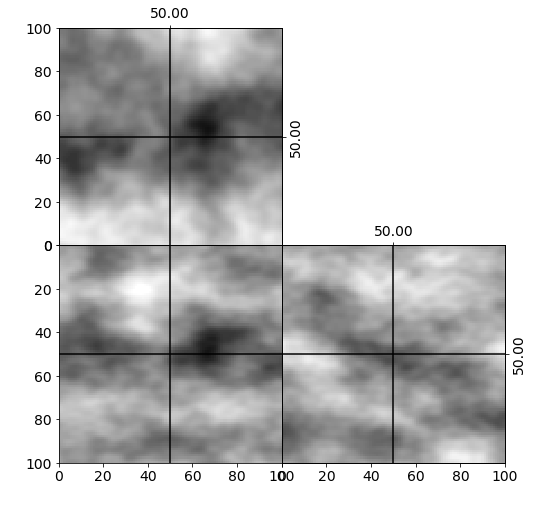

In [13]:
from utils.plot import plot3d

nx = 100; ny = 100; nz = 100 
nptsx = 2; nptsy = 3; nptsz = 2 

# Default arguments
octave = 4; period = 10.0; amp=1.0; persist=0.5; ncpu = 1 

# 3D plots
octs = np.zeros([nz,ny,nx])
octs = perlin(x=np.linspace(0,nptsx,nx),y=np.linspace(0,nptsy,ny),z=np.linspace(0,nptsz,nz),
              octaves=octave,amp=amp,persist=persist,period=period,ncpu=ncpu)

plot3d(octs)